In [88]:
import pandas as pd
import numpy as np
# import missingno as ms
import scipy.optimize as opt
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline
import itertools as iter


import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

#### Transpose of the data

In [9]:
def function_transpose(file):
    data=pd.read_csv(file)
    data=data.T
    return data
    
file = '/content/Indicators.csv'
function_transpose(file)

,0,1,2,3,4,5,6,7,8,9,...,147579,147580,147581,147582,147583,147584,147585,147586,147587,147588
CountryName,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,...,Dominican Republic,Dominican Republic,Dominican Republic,Dominican Republic,Dominican Republic,Dominican Republic,Dominican Republic,Dominican Republic,Dominican Republic,Dominican Republic
CountryCode,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,...,DOM,DOM,DOM,DOM,DOM,DOM,DOM,DOM,DOM,DOM
IndicatorName,"Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Age dependency ratio, old (% of working-age po...","Age dependency ratio, young (% of working-age ...",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Birth rate, crude (per 1,000 people)",CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (%...,...,CO2 emissions from liquid fuel consumption (% ...,CO2 emissions from liquid fuel consumption (kt),CO2 emissions from solid fuel consumption (% o...,CO2 emissions from solid fuel consumption (kt),Consumer price index (2010 = 100),Crop production index (2004-2006 = 100),"Death rate, crude (per 1,000 people)",DEC alternative conversion factor (LCU per US$),Discrepancy in expenditure estimate of GDP (co...,Discrepancy i
IndicatorCode,SP.ADO.TFRT,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,MS.MIL.XPRT.KD,MS.MIL.MPRT.KD,SP.DYN.CBRT.IN,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,EN.ATM.CO2E.GF.ZS,...,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.CO2E.SF.KT,FP.CPI.TOTL,AG.PRD.CROP.XD,SP.DYN.CDRT.IN,PA.NUS.ATLS,NY.GDP.DISC.KN,NaN
Year,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,...,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,NaN
Value,133.560907,87.797601,6.634579,81.02333,3000000.0,538000000.0,47.697888,59563.989217,0.643964,5.041292,...,93.127962,1441.131,0.236967,3.667,0.518677,64.47,13.123,1.0,0.0,NaN


In [ ]:
data.IndicatorName.unique()

#### Sample Selection for the Import and Export form the all attributes related to development 

In [43]:
def Sample_Selection(data, Indicator):
  X_data = data[['Year','Value']][data['IndicatorName'] ==  'GDP growth (annual %)']
  X_data=  X_data.rename(columns={"Value": "GDP growth (annual %)"})
  X_data['Year'] = X_data['Year'].astype('int')

  Y_data = data[['Year','Value']][data['IndicatorName'] ==  Indicator]
  Y_data= Y_data.rename(columns={"Value": Indicator})
  Y_data['Year'] = Y_data['Year'].astype('int')


  return pd.merge(X_data,Y_data,on='Year')

data = pd.read_csv('/content/Indicators.csv')
GDP_Export = Sample_Selection(data , 'Exports of goods and services (annual % growth)')
GDP_import = Sample_Selection(data , 'Imports of goods and services (annual % growth)')

## Normalize Dataset

In [59]:
def Normalize_Data(GDP_Export,GDP_import):
  
  GDP_Export['Exports of goods and services (annual % growth)']=(GDP_Export['Exports of goods and services (annual % growth)']-GDP_Export['Exports of goods and services (annual % growth)'].mean())/GDP_Export['Exports of goods and services (annual % growth)'].std()
  GDP_Export['GDP growth (annual %)']=(GDP_Export['GDP growth (annual %)']-GDP_Export['GDP growth (annual %)'].mean())/GDP_Export['GDP growth (annual %)'].std()
  
  GDP_import['Imports of goods and services (annual % growth)']=(GDP_import['Imports of goods and services (annual % growth)']-GDP_import['Imports of goods and services (annual % growth)'].mean())/GDP_import['Imports of goods and services (annual % growth)'].std()
  GDP_import['GDP growth (annual %)']=(GDP_import['GDP growth (annual %)']-GDP_import['GDP growth (annual %)'].mean())/GDP_import['GDP growth (annual %)'].std()

Normalize_Data(GDP_Export,GDP_import)

#### Visualize the Target data for final decision

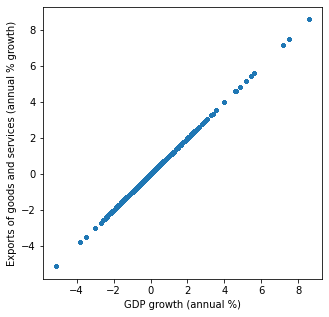

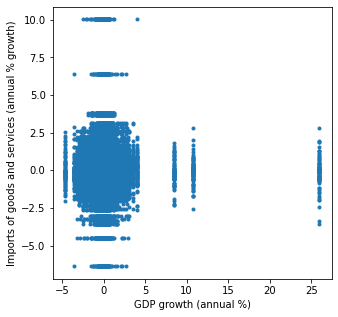

In [60]:
def plot_GDP(df, col1, col2):
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


plot_GDP(GDP_Export,'GDP growth (annual %)','Exports of goods and services (annual % growth)')
plot_GDP(GDP_import,'GDP growth (annual %)','Imports of goods and services (annual % growth)')

# K Mean Clustering on both Dataset

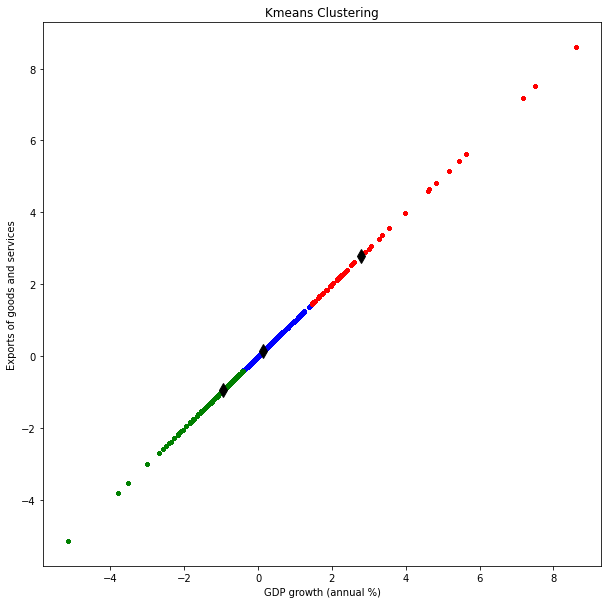

In [63]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=3)

# extract columns for fitting
kmeans.fit(GDP_Export[['GDP growth (annual %)','Exports of goods and services (annual % growth)']])     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(10,10))

col = ["blue", "red", "green", "magenta", "yellow", "red"]
for l in range(3):     # loop over the different labels
    plt.plot(GDP_Export['GDP growth (annual %)'][labels==l], GDP_Export['Exports of goods and services (annual % growth)'][labels==l], "o", markersize=3, color=col[l])
    
# Center of the clusters
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Kmeans Clustering")    
plt.xlabel("GDP growth (annual %)")
plt.ylabel("Exports of goods and services")
plt.show()

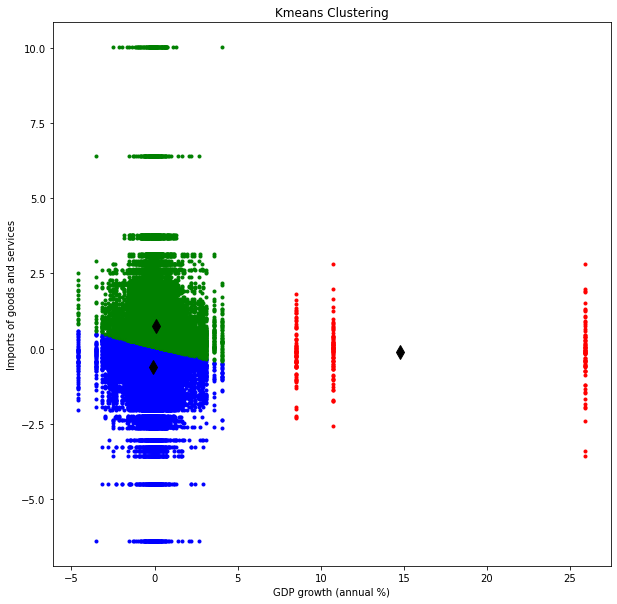

In [66]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=3)

# extract columns for fitting
kmeans.fit(GDP_import[['GDP growth (annual %)','Imports of goods and services (annual % growth)']])     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(10,10))

col = ["blue", "red", "green", "magenta", "yellow", "red"]
for l in range(3):     # loop over the different labels
    plt.plot(GDP_import['GDP growth (annual %)'][labels==l], GDP_import['Imports of goods and services (annual % growth)'][labels==l], "o", markersize=3, color=col[l])
    
# Center of the clusters
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Kmeans Clustering")    
plt.xlabel("GDP growth (annual %)")
plt.ylabel("Imports of goods and services")
plt.show()

# Model Fitting
  * Exponential model

In [83]:
# Define the exponential function and the logistics functions for fitting.

def exp_fit(x,scale,growth,c):
    # Computes exponential function with scale and growth as free parameters
    f = scale * np.exp(growth * x) +c
    
    return f



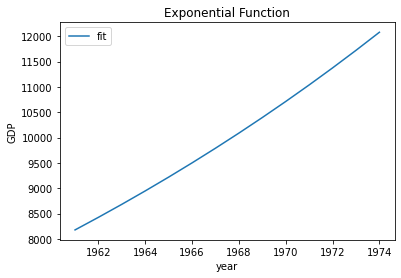

In [86]:
fit, c= opt.curve_fit(exp_fit,GDP_Export['Year'],GDP_Export['GDP growth (annual %)'], p0 = [0.005,0.03,5])   
GDP_Export["Exponential"] = exp_fit(GDP_Export["Year"], *fit)

plt.figure()
plt.plot(GDP_Export["Year"], GDP_Export["Exponential"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("GDP")
plt.title("Exponential Function")
plt.show()


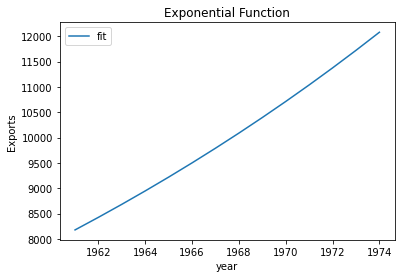

In [87]:
fit, c= opt.curve_fit(exp_fit,GDP_Export['Year'],GDP_Export['Exports of goods and services (annual % growth)'], p0 = [0.005,0.03,5])   
GDP_Export["Exponential"] = exp_fit(GDP_Export["Year"], *fit)
plt.figure()
plt.plot(GDP_Export["Year"], GDP_Export["Exponential"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("Exports")
plt.title("Exponential Function")
plt.show()


[inf inf inf]


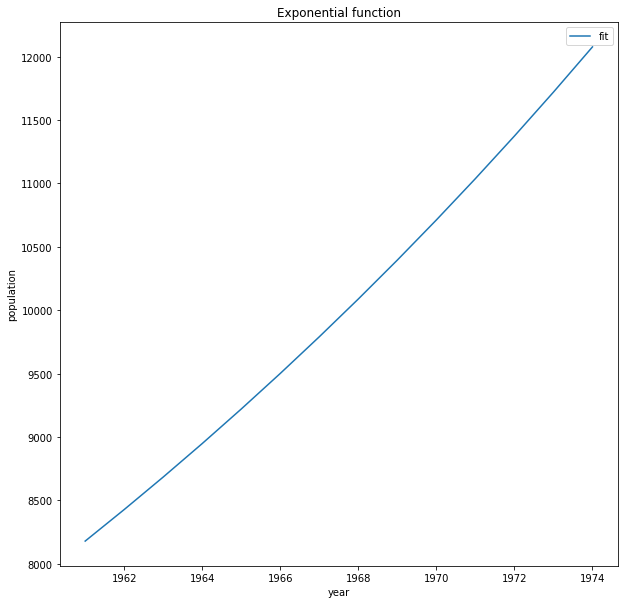

In [93]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, This routine can be used in assignment programs.
    """

    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   

# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(c))
print(sigma)

low, up = err_ranges(GDP_Export["Year"], exp_fit, fit, sigma)

plt.figure(figsize=(10,10))
plt.title("Exponential function")
plt.plot(GDP_Export["Year"], GDP_Export["Exponential"], label="fit")

plt.fill_between(GDP_Export["Year"], low, up, alpha=0.7)
plt.legend()
plt.xlabel("year")
plt.ylabel("population")
plt.show()